<a href="https://colab.research.google.com/github/isabelpbrasil/Limpeza-dos-dados-e-analise-exploratoria_Titanic/blob/main/Limpeza_dos_dados_e_analise_exploratoria_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#Carregar os dados

df = pd.read_csv('https://drive.google.com/uc?id=1F_-ow-50fmz-6fDbwba3PpfLBPKaVvGY')

#Identificar a quantidade de dados (linhas e colunas)

print(df.shape)

(891, 12)


In [2]:
#Quais colunas estão presentes na tabela

print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
#Visão geral dos dados, já é possível verificar se há necessidade de ajustes

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
#Verificar quantidade de valores ausentes

print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Questionamento:
Há muitos valores nulos da Cabine (687 de 891 valores), será que vale a pena manter essa coluna?

In [5]:
#Análise estatística básica

with pd.option_context("float_format","{:.2f}".format):
  display(df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [6]:
#Mostrar os primeiros 20 nomes, menores idades e se sobreviveu (1-sim, 0-não)

print(df.sort_values("Age")[["Name","Age","Survived"]].head(20))

                                  Name   Age  Survived
803    Thomas, Master. Assad Alexander  0.42         1
755          Hamalainen, Master. Viljo  0.67         1
644             Baclini, Miss. Eugenie  0.75         1
469      Baclini, Miss. Helene Barbara  0.75         1
78       Caldwell, Master. Alden Gates  0.83         1
831    Richards, Master. George Sibley  0.83         1
305     Allison, Master. Hudson Trevor  0.92         1
386    Goodwin, Master. Sidney Leonard  1.00         0
172       Johnson, Miss. Eleanor Ileen  1.00         1
183          Becker, Master. Richard F  1.00         1
164       Panula, Master. Eino Viljami  1.00         0
827              Mallet, Master. Andre  1.00         1
788         Dean, Master. Bertram Vere  1.00         1
381        Nakid, Miss. Maria ("Mary")  1.00         1
642      Skoog, Miss. Margit Elizabeth  2.00         0
119  Andersson, Miss. Ellis Anna Maria  2.00         0
479           Hirvonen, Miss. Hildur E  2.00         1
205       

In [7]:
#Quantidade de valores de cada coluna (junta os que são iguais)

print(df.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [8]:
#Quantidade de valores de cada coluna (junta os que são iguais), excluindo valores numéricos

print(df.describe(exclude="number"))

                       Name   Sex  Ticket Cabin Embarked
count                   891   891     891   204      889
unique                  891     2     681   147        3
top     Dooley, Mr. Patrick  male  347082    G6        S
freq                      1   577       7     4      644


In [9]:
#Qual a nomenclatura das variáveis Sex e Embarked

print(df["Sex"].unique())
print(df["Embarked"].unique())

['male' 'female']
['S' 'C' 'Q' nan]


In [10]:
#Criar nova coluna FamilySize (Somar conjugue, irmaos, pais e filhos +1 (própria pessoa))

df['FamilySize']=df['SibSp']+df['Parch']+1

#Criar nova coluna IsAlone dizendo se a pessoa está sozinha (Está sozinha=1, Não está sozinha=0)

df['IsAlone']=(df['FamilySize']==1).astype(int)

#Verificar valores únicos na coluna IsAlone

print(df['IsAlone'].unique())

[0 1]


In [11]:
#Valores estatísticos na coluna IsAlone

df['IsAlone'].describe()

,IsAlone
count,891.000000
mean,0.602694
std,0.489615
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


Com a média acima tenho a infomação de que 60% passageiros estavam sozinhos.

In [12]:
#Crosstab é uma função do pandas que serve para cruzar duas colunas de uma tabela.
#Tabela de sobrevivência por estar ou não sozinho (Sobreviveu=1, Sozinho=1)
#Normalize trás os valores em porcentagem, melhor para a análise

print(pd.crosstab(df['IsAlone'],df['Survived'],normalize='index'))

Survived         0         1
IsAlone                     
0         0.494350  0.505650
1         0.696462  0.303538


*   49,43%  que não sobreviveu não estava sozinho.
*   69,64% que não sobreviveu estava sozinho.

Podemos concluir que a maior parte dos que não sobreviveram estavam sozinhos (menos familiares para ajudar).

In [13]:
#Tabela de sobrevivência por sexo (Sobreviveu=1, Não sobreviveu=0)

print(pd.crosstab(df['Sex'],df['Survived'],normalize='index'))

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


*   25,79% que não sobreviveu era do sexo feminino.
*   81,10% que não sobreviveu era do sexo masculino.

Podemos concluir que muito mais homens não sobreviveram.

In [14]:
#Tratar valores nulos
#Primeiro verificar novamente quantidade de valores ausentes por coluna

print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
IsAlone          0
dtype: int64


In [15]:
#Tratar valores nulos da variável Embarked (local de embarque)
#Verificar valores de Embarked mais frequentes

print(df['Embarked'].value_counts())

#Preencer valores nulos com a moda (moda é o valor que mais se repetiu)

df.fillna({'Embarked':df['Embarked'].mode()[0]},inplace=True)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [16]:
#Tratar valores nulos da variável Age (idade)
#Criar coluna 'Title' (título)

df['Title']=df['Name'].str.extract(r' ([A-za-z]+)\.',expand=False)

#Padronizar títulos menos comuns

df['Title']=df['Title'].replace(['Mlle','Ms'],'Miss')
df['Title']=df['Title'].replace(['Mme','Mr'],'Mrs')
df['Title']=df['Title'].replace(['Lady','Countess','Dona','Sir','Don','Jonkheer'],'Royalty')
df['Title']=df['Title'].replace(['Capt','Col','Major','Dr','Rev',''],'Officer')

#Preencher valores ausentes de Age com a mediana por título

df['Age']=df.groupby('Title')['Age'].transform(lambda x:x.fillna(x.mean()))


In [17]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
IsAlone          0
Title            0
dtype: int64


In [18]:
#Tratar valores nulos da variável Cabin (cabine)
#Decidi retirar a coluna Cabin por ter muitos valores nulos

df.drop(columns='Cabin',inplace=True)

In [19]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
Title          0
dtype: int64


In [20]:
#Calcular a taxa de sobrevivência (média da coluna de sobreviventes)

survival_rate=df['Survived'].mean()
print(f"Taxa de sobrevivência: {survival_rate:.2%}")

Taxa de sobrevivência: 38.38%


In [21]:
#Taxa de sobrevivência por classe (média da coluna de sobreviventes agrupado por classe)

print(df.groupby('Pclass')['Survived'].mean()*100)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


As pessoas da primeira classe foram as que mais sobreviveram. As de terceira classe foram as que menos sobreviveram.

In [22]:
#Taxa de sobrevivência por gênero (média da coluna de sobreviventes agrupado por genero)

print(df.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


A porcentagem de mulheres que sobreviveram foi maior que a de homens.

In [23]:
#Após tratar valores nulos, calcular estatísticas novamente:
#Estatísticas descritivas das variáveis numéricas

print(df.describe())

#Estatística das variáveis categóricas

print(df.describe(include=['object']))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.807742    0.523008   
std     257.353842    0.486592    0.836071   13.284148    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   21.845638    0.000000   
50%     446.000000    0.000000    3.000000   30.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  FamilySize     IsAlone  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    1.904602    0.602694  
std      0.806057   49.693429    1.613459    0.489615  
min      0.000000    0.000000    1.000000    0.000000  
25%      0.000000    7.910400    1.000000    0.000000  
50%      0.000000   14.454200    

In [24]:
#Frequência absoluta (Não sobreviveram=0; Sobreviveram=1)

print(df['Survived'].value_counts())

#Frequência relativa (Não sobreviveram=0; Sobreviveram=1)

print(df['Survived'].value_counts(normalize=True).map("{:.1%}".format))

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    61.6%
1    38.4%
Name: proportion, dtype: object


In [25]:
#Taxa de sobrevivência por porta de embarque (média da coluna de sobreviventes agrupado por porta de embarque)

print(df.groupby('Embarked')['Survived'].mean()*100)

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


In [26]:
#Idade média dos sobreviventes (1) vs. não sobreviventes (0)

print(df.groupby('Survived')['Age'].mean())

#Tarifa média dos sobreviventes (1) vs. não sobreviventes (0)

print(df.groupby('Survived')['Fare'].mean())

Survived
0    30.824001
1    28.176379
Name: Age, dtype: float64
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


Quem pagou mais caro (primeira classe) foram os que mais sobreviveram.

In [27]:
#Taxa de sobrevivência por título (Sr., Sra., etc)

print(df.groupby('Title')['Survived'].mean().map("{:.1%}".format))

#Taxa de obrevivência por tamanho da família

print(df.groupby('FamilySize')['Survived'].mean().map("{:.1%}".format))

#Taxa de sobrevivência por estar sozinho

print(df.groupby('IsAlone')['Survived'].mean().map("{:.1%}".format))

Title
Master     57.5%
Miss       70.3%
Mrs        28.1%
Officer    27.8%
Royalty    60.0%
Name: Survived, dtype: object
FamilySize
1     30.4%
2     55.3%
3     57.8%
4     72.4%
5     20.0%
6     13.6%
7     33.3%
8      0.0%
11     0.0%
Name: Survived, dtype: object
IsAlone
0    50.6%
1    30.4%
Name: Survived, dtype: object


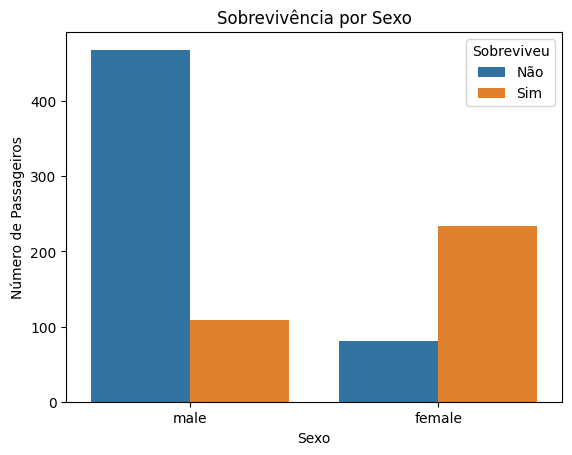

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

#Gráfico sobrevivencia por sexo

sns.countplot(x='Sex',hue='Survived',data=df)
plt.title('Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Passageiros')
plt.legend(title='Sobreviveu',labels=['Não','Sim'])
plt.show()

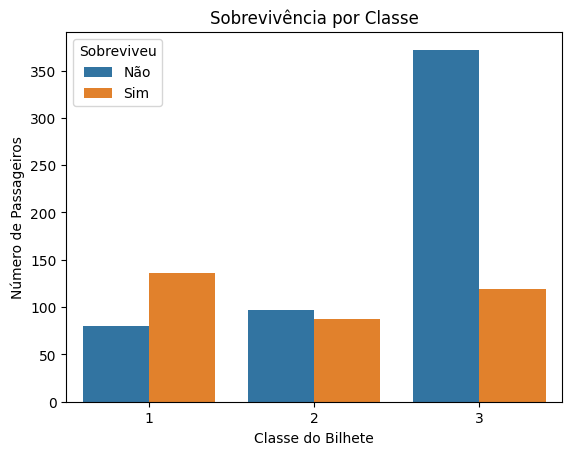

In [29]:
#Gráfico sobrevivencia por classe

sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title('Sobrevivência por Classe')
plt.xlabel('Classe do Bilhete')
plt.ylabel('Número de Passageiros')
plt.legend(title='Sobreviveu',labels=['Não','Sim'])
plt.show()

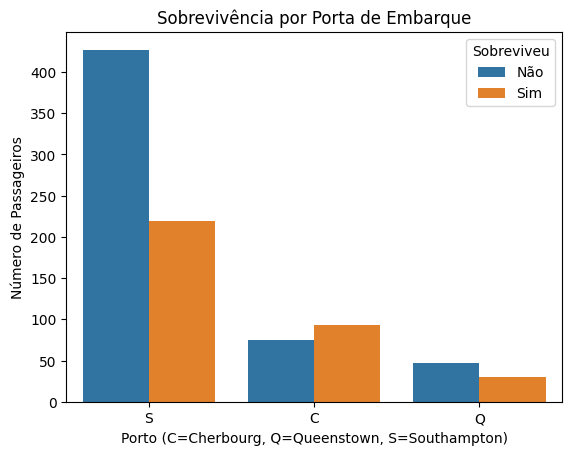

In [37]:
#Gráfico sobrevivencia por porta de embarque

sns.countplot(x='Embarked',hue='Survived',data=df)
plt.title('Sobrevivência por Porta de Embarque')
plt.xlabel('Porto (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.ylabel('Número de Passageiros')
plt.legend(title='Sobreviveu',labels=['Não','Sim'])
plt.show()

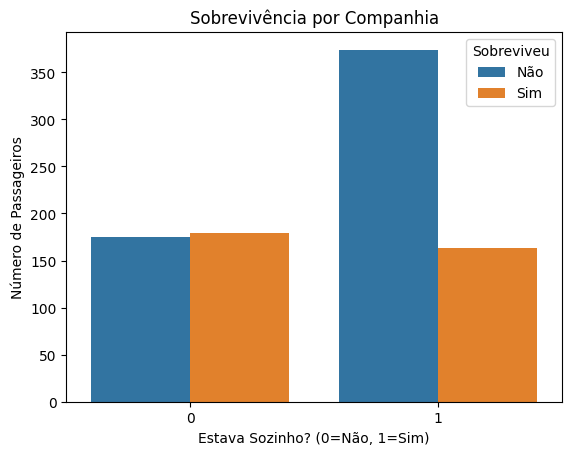

In [38]:
#Gráfico sobrevivencia por companhia

sns.countplot(x='IsAlone',hue='Survived',data=df)
plt.title('Sobrevivência por Companhia')
plt.xlabel('Estava Sozinho? (0=Não, 1=Sim)')
plt.ylabel('Número de Passageiros')
plt.legend(title='Sobreviveu',labels=['Não','Sim'])
plt.show()

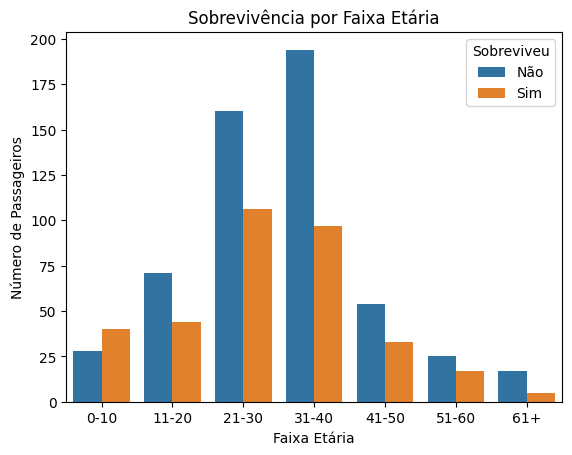

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Criar faixas etárias
df['FaixaEtaria']=pd.cut(df['Age'],bins=[0,10,20,30,40,50,60,80],labels=[
    '0-10','11-20','21-30','31-40','41-50','51-60','61+'])

#Gráfico de barras lado a lado (countplot)
sns.countplot(data=df,x='FaixaEtaria',hue='Survived')
plt.title('Sobrevivência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Passageiros')
plt.legend(title='Sobreviveu',labels=['Não','Sim'])
plt.show()